In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [6]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

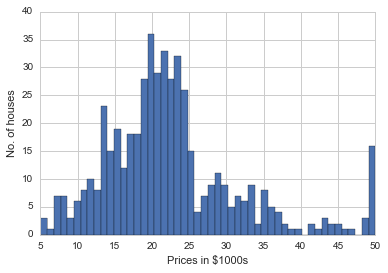

In [7]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('No. of houses')


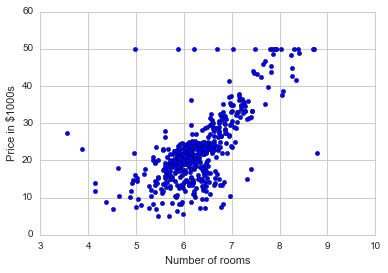

In [8]:
# plt.scatter(boston.data[:,5],boston.target)

# plt.xlabel('No. of rooms')
# plt.ylabel('Prices in $1000s
           
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5],boston.target)

#label
plt.ylabel('Price in $1000s')

plt.xlabel('Number of rooms')

In [22]:
boston_df = DataFrame(boston.data)

In [23]:
boston_df.columns = boston.feature_names

In [24]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [25]:
boston_df['Price'] = boston.target

In [26]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


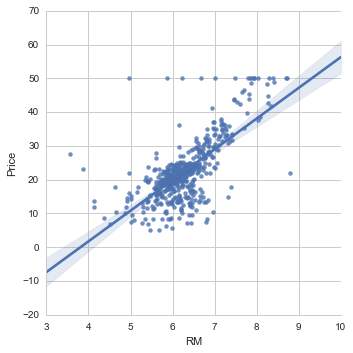

In [20]:
sns.lmplot('RM','Price',data=boston_df)

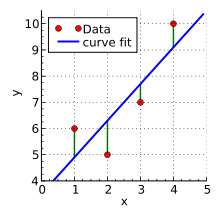

In [21]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

In [27]:
X = boston_df.RM

X = np.vstack(boston_df.RM)

In [23]:
X.shape

(506, 1)

In [25]:
Y = boston_df.Price

In [28]:
X = np.array( [ [value,1] for value in X ] )

In [27]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [30]:
m, b = np.linalg.lstsq(X,Y)[0]

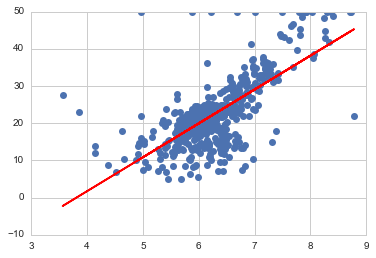

In [33]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

In [34]:
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

# Print
print "The root mean squared error was %.2f " %rmse 

The root mean squared error was 6.60 


In [13]:
import sklearn
from sklearn.linear_model import LinearRegression

In [14]:
lreg = LinearRegression()

In [15]:

# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

# Implement Linear Regression
lreg.fit(X_multi,Y_target)

print ' The estimated intercept coefficient is %.2f ' %lreg.intercept_

print ' The number of coefficients used was %d ' % len(lreg.coef_)

 The estimated intercept coefficient is 36.49 
 The number of coefficients used was 13 


In [16]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,0,-0.107171
1,1,0.046395
2,2,0.020860
3,3,2.688561
4,4,-17.795759
5,5,3.804752
6,6,0.000751
7,7,-1.475759
8,8,0.305655
9,9,-0.012329


In [38]:
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [43]:
print X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(379, 2) (379,) (127, 2) (127,)


In [45]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [47]:
print "Fit a model X_train, and calculate the MSE with Y_train: %.2f" %np.mean((Y_train - pred_train) ** 2)

Fit a model X_train, and calculate the MSE with Y_train: 42.82


In [48]:
print "Fit a model X_test, and calculate the MSE with Y_test: %.2f" %np.mean((Y_test - pred_test) ** 2)

Fit a model X_test, and calculate the MSE with Y_test: 46.80


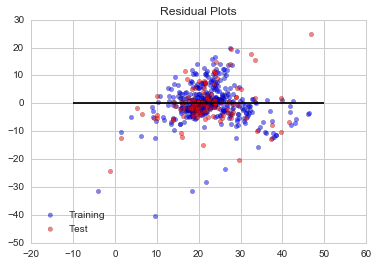

In [49]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')